In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from framework_pkg.framework import FrameWork
from framework_pkg.survival_probablity import ULDM, MSW

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 1e-7, 
        'mu3'  : 0.  ,
        'mdm'  : 1e2 , 
        'alpha': 0.  ,
        'epsx' : 0.  ,
        'epsy' : 1.  ,
        'M12'  : 6.9e-5 }



annual_data = np.array(pd.read_csv('./Data/plot-data.csv'))

Warning!: Python module pyslha not found, disabling slha reading routines


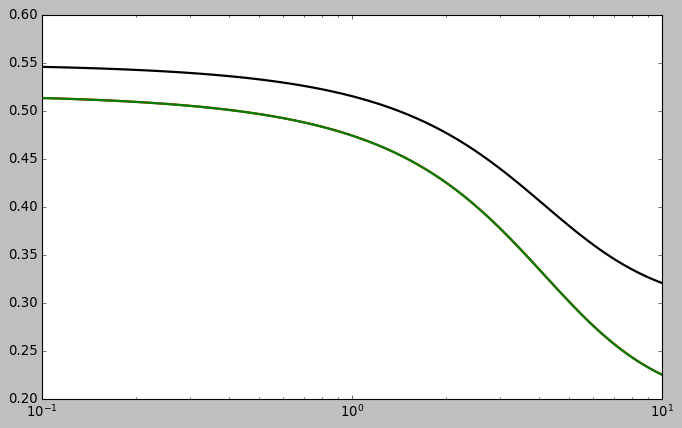

In [34]:
param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 5e-7, 
        'mu3'  : 0.  ,
        'mdm'  : 1e2 , 
        'alpha': 0  ,
        'epsx' : 0.  ,
        'epsy' : 0.  ,
        'M12'  : 6.9e-5 }

enu = np.logspace(-1,1,100)
eta = np.array([3*np.pi/4])
depth = 0

frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                        first_day='2015,1,1',
                                        last_day='2016,1,1'
                                    )

_, theta, distance, days= frame_predicted_total_signal._variable_maker()

survival_probablity_msw = MSW(param, enu, eta, depth)
survival_probablity_uldm, _ = ULDM(param, enu, eta, theta, distance, days, depth)

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.ylim(0.2,0.6)
plt.plot(enu, survival_probablity_msw[0], lw=2, color='k')
plt.plot(enu, np.mean(survival_probablity_uldm[:,0,:],axis=0), lw=2, color='r')



param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 5e-7, 
        'mu3'  : 0.  ,
        'mdm'  : 1e2 , 
        'alpha': 45  ,
        'epsx' : 0.  ,
        'epsy' : 0.  ,
        'M12'  : 6.9e-5 }

survival_probablity_uldm, _ = ULDM(param, enu, eta, theta, distance, days, depth)

plt.plot(enu, np.mean(survival_probablity_uldm[:,0,:],axis=0), lw=2, color='g')

Text(0.55, 1.06, '$\\rm m_{dm} = 10^{-21} \\ [eV] $')

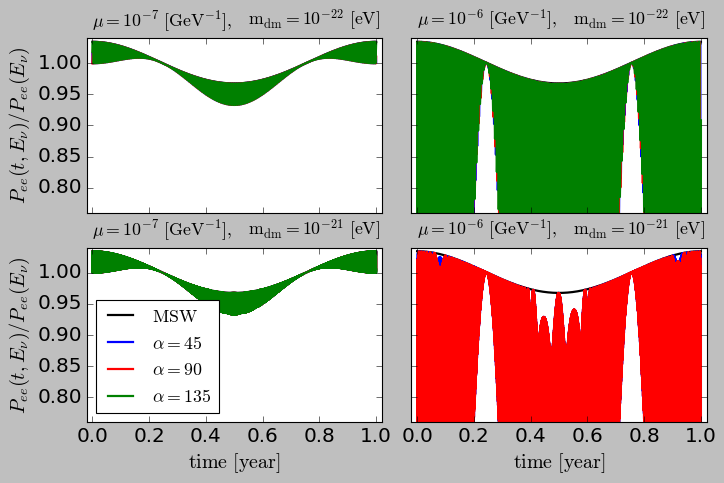

In [217]:
LIGHT_SPEED = 2.998 # 1e8 m/s
RHO_DM2  = np.sqrt(2 * 0.4 * 7.65) #e-21 GeV^2
ASTRO_UNIT    =  1.496 #1e11 m

frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                        first_day='2015,1,1',
                                        last_day='2016,1,1'
                                    )

_, theta, distance, days= frame_predicted_total_signal._variable_maker(dtheta=0.0005)
day_list  = days * 3.6525 * 2.4 * 6. * 6. / 6.6 # in 1e21 eV^-1
param['epsx'] = 0.
param['epsy'] = 1.
polar_vec = np.sqrt((1 - ( param['epsx'] * np.cos(theta) + param['epsy'] * np.sin(theta))**2))
#10^-24 ev order of 10 years, 
#10^-20 ev order of day

plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.formatter.useoffset'] = False

fig  = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.1)

ax1 = fig.add_subplot(221)

ax1.set_ylim(0.76,1.04)
ax1.set_xlim(-0.02,1.02)
ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)
#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ P_{ee}(t,E_{\nu})/ P_{ee}(E_{\nu}) $',fontsize=18)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.plot(days, 1 / distance**2, lw=2, color='k')

param['mdm'] = 1e1
param['mu2'] = 1e-7

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax1.plot(days,uldm_term2, lw=2, color='b')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax1.plot(days, uldm_term2, lw=2, color='r')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax1.plot(days, uldm_term2, lw=2, color='g')
ax1.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
ax1.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-22} \ [eV] $', fontsize=16)


ax2 = fig.add_subplot(222)
ax2.set_ylim(0.76,1.04)
ax2.set_xlim(-0.02,1.02)
ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)
#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
#ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.xaxis.set_major_formatter(plt.NullFormatter())

ax2.plot(days, 1 / distance**2, lw=2, color='k')
param['mdm'] = 1e1
param['mu2'] = 1e-6

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax2.plot(days, uldm_term2, lw=2, color='b')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax2.plot(days, uldm_term2, lw=2, color='r')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax2.plot(days, uldm_term2, lw=2, color='g')
ax2.text(0.0, 1.06, r'$\rm \mu = 10^{-6} \ [GeV^{-1}], $', fontsize=16)
ax2.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-22} \ [eV] $', fontsize=16)

ax3 = fig.add_subplot(223)

ax3.set_ylim(0.76,1.04)
ax3.set_xlim(-0.02,1.02)
ax3.tick_params(axis='both', which='minor', length=4)
ax3.tick_params(axis='both', which='major', length=5)
ax3.set_xlabel(r'${\rm time} \ \rm [year]$',fontsize=18)
ax3.set_ylabel(r'$ P_{ee}(t,E_{\nu})/ P_{ee}(E_{\nu}) $',fontsize=18)
#ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax3.plot(days, 1 / distance**2, lw=2, color='k', label=r'$ \rm MSW $')

param['mdm'] = 1e2
param['mu2'] = 1e-7

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax3.plot(days,uldm_term2, lw=2, color='b', label=r'$ \alpha = 45 $')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax3.plot(days, uldm_term2, lw=2, color='r', label=r'$ \alpha = 90 $')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax3.plot(days, uldm_term2, lw=2, color='g', label=r'$ \alpha = 135 $')
ax3.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
ax3.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-21} \ [eV] $', fontsize=16)
plt.legend(loc='lower left', fontsize=16)

ax4 = fig.add_subplot(224)
ax4.set_ylim(0.76,1.04)
ax4.set_xlim(-0.02,1.02)
ax4.tick_params(axis='both', which='minor', length=4)
ax4.tick_params(axis='both', which='major', length=5)
ax4.set_xlabel(r'${\rm time} \ \rm [year]$',fontsize=18)
#ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax4.yaxis.set_major_formatter(plt.NullFormatter())

ax4.plot(days, 1 / distance**2, lw=2, color='k')
param['mdm'] = 1e2
param['mu2'] = 1e-6

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax4.plot(days, uldm_term2, lw=2, color='b')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax4.plot(days, uldm_term2, lw=2, color='r')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
#ax4.plot(days, uldm_term2, lw=2, color='g')
ax4.text(0.0, 1.06, r'$\rm \mu = 10^{-6} \ [GeV^{-1}], $', fontsize=16)
ax4.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-21} \ [eV] $', fontsize=16)

#plt.savefig('./mu_mdm_01.pdf', bbox_inches='tight')

In [16]:
frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                        first_day='2015,1,1',
                                        last_day='2016,1,1'
                                    )

predicted_total_signal = frame_predicted_total_signal.__getitem__(param, name="ULDM") 

print(np.mean(predicted_total_signal))



/Users/ipm/Documents/GitHub/NeuMod/external/PEANUTS/peanuts/files.py:74: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(*args, **kwargs)
/Users/ipm/Documents/GitHub/NeuMod/external/PEANUTS/peanuts/files.py:74: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(*args, **kwargs)
/Users/ipm/Documents/GitHub/NeuMod/external/PEANUTS/peanuts/files.py:74: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(*args, **kwargs)
/Users/ipm/Documents/GitHub/NeuMod/external/PEANUTS/peanuts/files.py:74: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(*args

0.4350296119348591


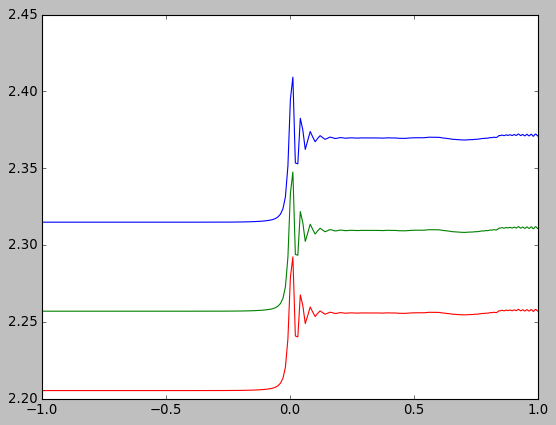

In [17]:
plt.plot(np.cos(frame_predicted_total_signal.eta), 1e4 * frame_predicted_total_signal.SNO_norm * predicted_total_signal[0,:,0], 'b-')
plt.plot(np.cos(frame_predicted_total_signal.eta), 1e4 * frame_predicted_total_signal.SNO_norm * predicted_total_signal[80,:,0], 'r-')
plt.plot(np.cos(frame_predicted_total_signal.eta), 1e4 * frame_predicted_total_signal.SNO_norm * np.mean(predicted_total_signal[:,:,0],axis=0), 'g-')

<ErrorbarContainer object of 3 artists>

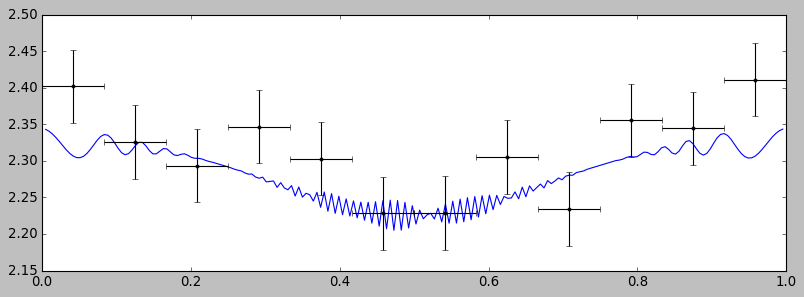

In [18]:
plt.figure(figsize=(12,4))
plt.xlim(0,1)


plt.plot(frame_predicted_total_signal.day, 1e4 * frame_predicted_total_signal.SNO_norm * np.mean(predicted_total_signal,axis=(1,2)), 'b-')

plt.errorbar(annual_data[:,0], annual_data[:,1], 0.05 * np.ones(12), 0.5*(annual_data[1,0] - annual_data[0,0])*np.ones(12) , fmt='k.')